<a href="https://colab.research.google.com/github/yeabsiramoges/SIRModel/blob/main/SIRModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy as sp
from scipy.integrate import solve_ivp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy import optimize

In [ ]:
epsilon = 0.001
np.roots([epsilon,0,0,0,-1,1])

array([-5.84971163+0.j        , -0.24529354+5.65020053j,
       -0.24529354-5.65020053j,  5.33929367+0.j        ,
        1.00100504+0.j        ])

In [ ]:
(1/epsilon)**(1/4)

5.623413251903491

In [ ]:
eps_num=[pow(10,eps) for eps in np.arange(-6,-0.70,0.001)];
y_num=[[np.real(root) for root in np.roots([eps,0,0,0,-1,0,0,1]) if np.imag(root)==0] for eps in eps_num];
y_pos=[[yi for yi in y if yi>0] for y in y_num]; #Positive roots#

In [ ]:
eps_ana=[pow(10,eps) for eps in np.arange(-6,0,0.001)];
y1=[1+eps-eps for eps in eps_ana];
y2=[(1./eps)**(1/4) for eps in eps_ana];

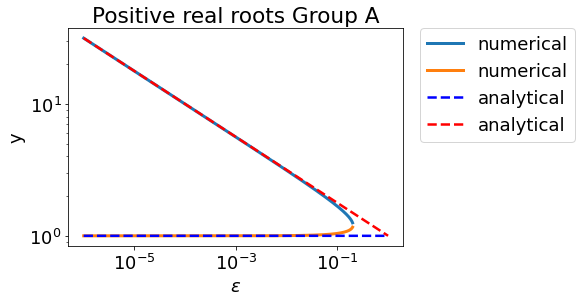

In [ ]:
plt.rcParams['font.family']='DejaVu Sans'
plt.rcParams['font.size']=18
plt.loglog(eps_num,y_pos,linewidth=3,label="numerical");
plt.xlabel("$\epsilon$");
plt.ylabel("y");
plt.loglog(eps_ana,y1,"b--",linewidth=2.5,label="analytical");
plt.loglog(eps_ana,y2,"r--",linewidth=2.5,label="analytical");
plt.title("Positive real roots Group A")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.savefig('plot1.png',dpi=600,bbox_inches='tight')

In [ ]:
def expox(x):
  return x*np.exp(-x)

In [ ]:
x= np.linspace(0,10,1000)
plt.rcParams['font.family']='DejaVu Sans'
plt.figure(figsize=(9,8))
plt.rcParams.update({'font.size': 18})
plt.plot(x,reee(x),'k',LineWidth=3, label = "Solution")
plt.plot(x,0.2*np.ones(np.size(x)),'r',LineWidth=3, label = "Epsilon")

#plt.ylim(0,2)
#plt.xlim(50,1000)
#plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([1e-9,1e0])
plt.xlim([0,4])
plt.grid()
plt.legend()
plt.show()

NameError: ignored

<Figure size 648x576 with 0 Axes>

In [ ]:
def xeps(x):
  return expox(x) - 0.2

In [ ]:
epsilon = 0.2
optimize.newton(xeps,0.1)


0.2591711018190737

In [ ]:
optimize.newton(xeps, 2)

2.542641357773525

In [ ]:
np.log(1/epsilon)

1.6094379124341003

Can we guess what is going on? 

In [ ]:
def f(x,y):
    y1= -y+1 / (1+x**2)
    return y1
sol1 = solve_ivp(f, [2,1000],[3,2])
ts = sol1.t
ys = sol1.y[0]

In [ ]:
t = np.linspace(2,1000,10000)

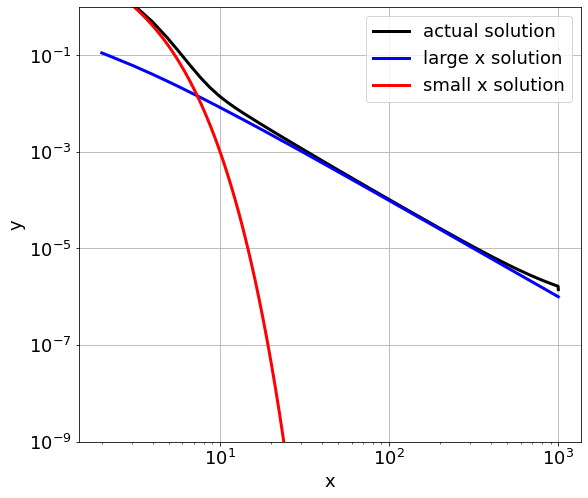

In [ ]:
plt.rcParams['font.family']='DejaVu Sans'
plt.figure(figsize=(9,8))
plt.rcParams.update({'font.size': 18})
plt.loglog(sol1.t,sol1.y[0].T,'k',LineWidth=3, label = "actual solution")
plt.loglog(sol1.t, 1 / (1+sol1.t)**2, 'b',LineWidth=3,label = "large x solution") 
plt.loglog(t, 3*np.exp(2-t), 'r',LineWidth=3,label = "small x solution") 

#plt.ylim(0,2)
#plt.xlim(50,1000)
#plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([1e-9,1e0])
plt.grid()
plt.legend()
plt.show()

In [ ]:
k = .3
C = 10
p = .6
N = 1000

def SIR(t,z,beta=C*p/N,gamma=k):

  S,I,R = z

  return [-beta*S*I, beta*S*I - gamma*I, gamma*I]

In [ ]:
ts = np.linspace(0,20000,1000)

In [ ]:
sol = solve_ivp(SIR, ts,[990,10,0])

In [ ]:
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 182
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 4.71379882e-04, 5.18517871e-03, 5.23231670e-02,
       2.05747618e-01, 4.23411043e-01, 6.89348338e-01, 1.02279773e+00,
       1.20475483e+00, 1.38671194e+00, 1.60525404e+00, 1.81327454e+00,
       2.02872734e+00, 2.25552310e+00, 2.49665876e+00, 2.75477065e+00,
       3.03272977e+00, 3.33400168e+00, 3.66308582e+00, 4.02628071e+00,
       4.43326258e+00, 4.90047552e+00, 5.45804324e+00, 6.16266242e+00,
       7.12316068e+00, 8.56996384e+00, 1.11124928e+01, 1.44055729e+01,
       1.76497021e+01, 2.00200200e+01])
 t_events: None
        y: array([[9.90000000e+02, 9.89971963e+02, 9.89687502e+02, 9.86392041e+02,
        9.67289404e+02, 8.94390695e+02, 6.51283625e+02, 2.26821175e+02,
        9.99790167e+01, 4.18729033e+01, 1.48570716e+01, 5.77956763e+00,
        2.29225349e+00, 9.19074254e-01, 3

In [ ]:
sol.t

array([0.00000000e+00, 4.71379882e-04, 5.18517871e-03, 5.23231670e-02,
       2.05747618e-01, 4.23411043e-01, 6.89348338e-01, 1.02279773e+00,
       1.20475483e+00, 1.38671194e+00, 1.60525404e+00, 1.81327454e+00,
       2.02872734e+00, 2.25552310e+00, 2.49665876e+00, 2.75477065e+00,
       3.03272977e+00, 3.33400168e+00, 3.66308582e+00, 4.02628071e+00,
       4.43326258e+00, 4.90047552e+00, 5.45804324e+00, 6.16266242e+00,
       7.12316068e+00, 8.56996384e+00, 1.11124928e+01, 1.44055729e+01,
       1.76497021e+01, 2.00200200e+01])

In [ ]:
S = sol.y[0]
I = sol.y[1]
R = sol.y[2]

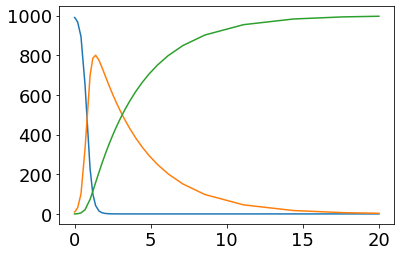

In [ ]:
plt.plot(sol.t,S)
plt.plot(sol.t,I)
plt.plot(sol.t,R)